In [37]:
import requests 
import bs4
import pandas as pd
import numpy as np
import json
import matplotlib 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
EDIBLE_FRUITS_URL = 'https://en.wikipedia.org/wiki/List_of_culinary_fruits'
WIKIPEDIA_API_URL = 'https://en.wikipedia.org/w/api.php'

In [3]:
response = requests.get(EDIBLE_FRUITS_URL)
if response.status_code == 200:
    print ("Get Successfull")
else:
    print ("Get Failed")

Get Successfull


In [4]:
resp_soap = bs4.BeautifulSoup(response.text)

In [5]:
resp_soap.title

<title>List of culinary fruits - Wikipedia</title>

###### Header of the first table

In [6]:
resp_soap.table.tbody.tr

<tr>
<th><a href="/wiki/Common_name" title="Common name">Common name</a>
</th>
<th><a href="/wiki/Binomial_nomenclature" title="Binomial nomenclature">Species name</a>
</th>
<th><a href="/wiki/Cultivar" title="Cultivar">Cultivar list</a>
</th></tr>

In [7]:
def add_to_dictionary(table_dict):
    
    if (row_list[0]) in table_dict:
        table_dict[row_list[0]][1] = pos_dict[row_list[0]][1] + ", " + row_list[2]
    else:
        table_dict[row_list[0]] = [row_list[1],row_list[2]]

In [8]:
def process_row(row,ncolumns=0):
    
    row_values = []
    col_count = 0
    for column in row:
        
        if isinstance(column,bs4.element.Tag): # Avoid processing NavigableString - Mostly newline char      
            col_count += 1
            row_values.append(column.get_text(strip=True))
            
        if ncolumns > 0 and col_count >= ncolumns:
            break
            
    return row_values

In [9]:
def process_table(soap_msg_table,ncolumns=0):
    
    row_list = []
    for row in soap_msg_table:
        
        if isinstance(row,bs4.element.Tag): # Avoid processing NavigableString - Mostly newline char
            row_list.append(process_row(row,ncolumns))
            
    #print (row_list)
    return row_list

In [10]:
all_common_spices = pd.DataFrame()
for table in resp_soap.find_all("table"):
    common_spices = pd.DataFrame(process_table(table.tbody,ncolumns=3))
    header = common_spices.loc[0]
    common_spices = common_spices[1:]
    all_common_spices = all_common_spices.append(common_spices)
all_common_spices.columns = header

In [11]:
all_common_spices.head()

,Common name,Species name,Cultivar list
1,Apple,Malus pumila,Apple cultivars
2,Chinese quince,Pseudocydonia sinensis,
3,Chokeberry,Aronia melanocarpa,
4,Cocky apple,Planchonia careya,
5,Eastern mayhaw,Crataegus aestivalis,


In [12]:
all_common_spices.shape

(422, 3)

In [13]:
all_common_spices.loc[all_common_spices['Common name'] == 'Saguaro fruit']

,Common name,Species name,Cultivar list
7,Saguaro fruit,Carnegiea gigantea,


###### Get the data using Wikipedia API

In [19]:
def get_wiki_url(query):
    #return WIKIPEDIA_API_URL + f'?action=parse&format=json&page={query}'
    return 'https://en.wikipedia.org/wiki/' + query

In [29]:
response = requests.get(get_wiki_url('Apple'))
if response.status_code == 200:
    print ("Get Successfull")
else:
    print ("Get Failed")

Get Successfull


In [24]:
#json_response = json.loads(response.text)

In [23]:
#json_response['parse']['text']['*']

In [52]:
#resp_soap = bs4.BeautifulSoup(json_response['parse']['text']['*'])
resp_soap = bs4.BeautifulSoup(response.text)

In [53]:
resp_soap.get_text()

'\n\n\n\nApple - Wikipedia\ndocument.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Apple","wgTitle":"Apple","wgCurRevisionId":900292755,"wgRevisionId":900292755,"wgArticleId":18978754,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 Spanish-language sources (es)","Wikipedia indefinitely semi-protected pages","Wikipedia indefinitely move-protected pages","Articles with short description","Use dmy dates from October 2017","Good articles","Articles with \'species\' microformats","All accuracy disputes","Articles with disputed statements from December 2017","All pages needing factual verification","Wikipedia articles needing factual verification from December 2017","Portal templates with all redlinked portals","Commons categ

In [50]:
stopwords = set(STOPWORDS)
# instantiate a word cloud object
response_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
response_wc.generate(resp_soap.get_text())

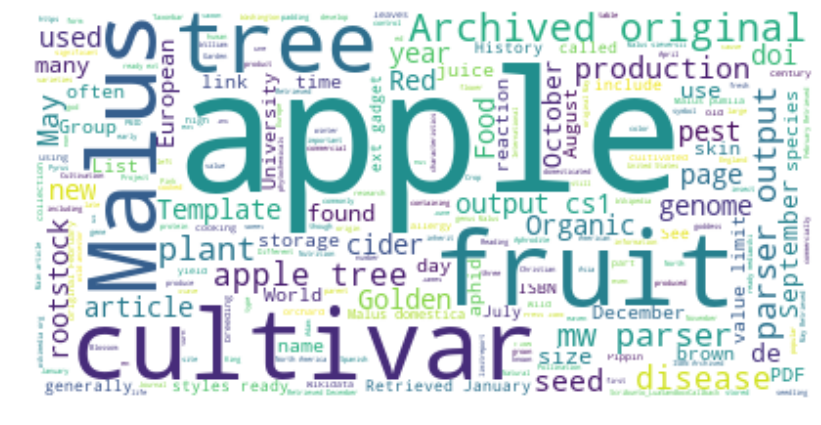

In [51]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(response_wc, interpolation='bilinear')

plt.axis('off')
plt.show()